# A tale of chosing a dataset ...



![title](the-beginning.jpg)

> ## 2016 New Coder Survey

> ### A survey of 15,000+ people who are new to software development

> **Free Code Camp** is an open source community where you learn to code and build projects for nonprofits.

> **CodeNewbie.org** is the most supportive community of people learning to code.

> Together, we surveyed more than 15,000 people who are actively learning to code. We reached them through the twitter accounts and email lists of various organizations that help people learn to code.

> Our goal was to understand these people's motivations in learning to code, how they're learning to code, their demographics, and their socioeconomic background.

> *** Data from Kaggle

# Data Outline

Key takeaways:

 - 15620 records
 - 113 columns
 - lots of missing data (we'll explore that later!)

## IOA



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices, dmatrix
import statsmodels.api as sm

import plotly.tools as tls



%matplotlib inline

DATA_DIR = './02/'

In [2]:
df = pd.read_csv(DATA_DIR + '2016-FCC-New-Coders-Survey-Data.csv', low_memory=False)

# comment here

In [3]:
df.info(verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 113 columns):
Age                             float64
AttendedBootcamp                float64
BootcampFinish                  float64
BootcampFullJobAfter            float64
BootcampLoanYesNo               float64
BootcampMonthsAgo               float64
BootcampName                    object
BootcampPostSalary              float64
BootcampRecommend               float64
ChildrenNumber                  float64
CityPopulation                  object
CodeEventBootcamp               float64
CodeEventCoffee                 float64
CodeEventConferences            float64
CodeEventDjangoGirls            float64
CodeEventGameJam                float64
CodeEventGirlDev                float64
CodeEventHackathons             float64
CodeEventMeetup                 float64
CodeEventNodeSchool             float64
CodeEventNone                   float64
CodeEventOther                  object
CodeEventRail

In [4]:
df.describe()

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning:

Invalid value encountered in percentile



,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,...,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,1.000000,18.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000000.000000


In [5]:
# 

df.sample(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
5476,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Chemistry,NaN
11792,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15510,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,75000.0
15283,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master's degree (non-professional),Psychology,NaN
3398,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,bachelor's degree,Math,NaN
8103,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,bachelor's degree,Management Information Systems,20000.0
8703,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,2500.0
5578,25.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master's degree (non-professional),International Studies,40000.0
11247,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13451,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,bachelor's degree,Engineering,NaN


In [6]:
# opting not to clean up column names as they're only CamelCase, 
# no oher invalid characters observed

#df.columns = map(str.lower, df.columns)

In [7]:
#g = sns.pairplot(df, size=1);

In [8]:
#df = df.select_dtypes(include=[np.number])

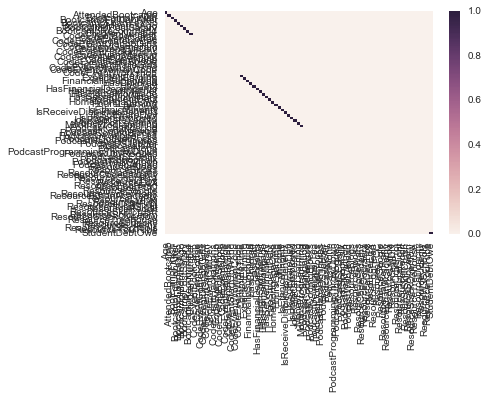

In [9]:
sns.heatmap(df.corr() > 0.9);

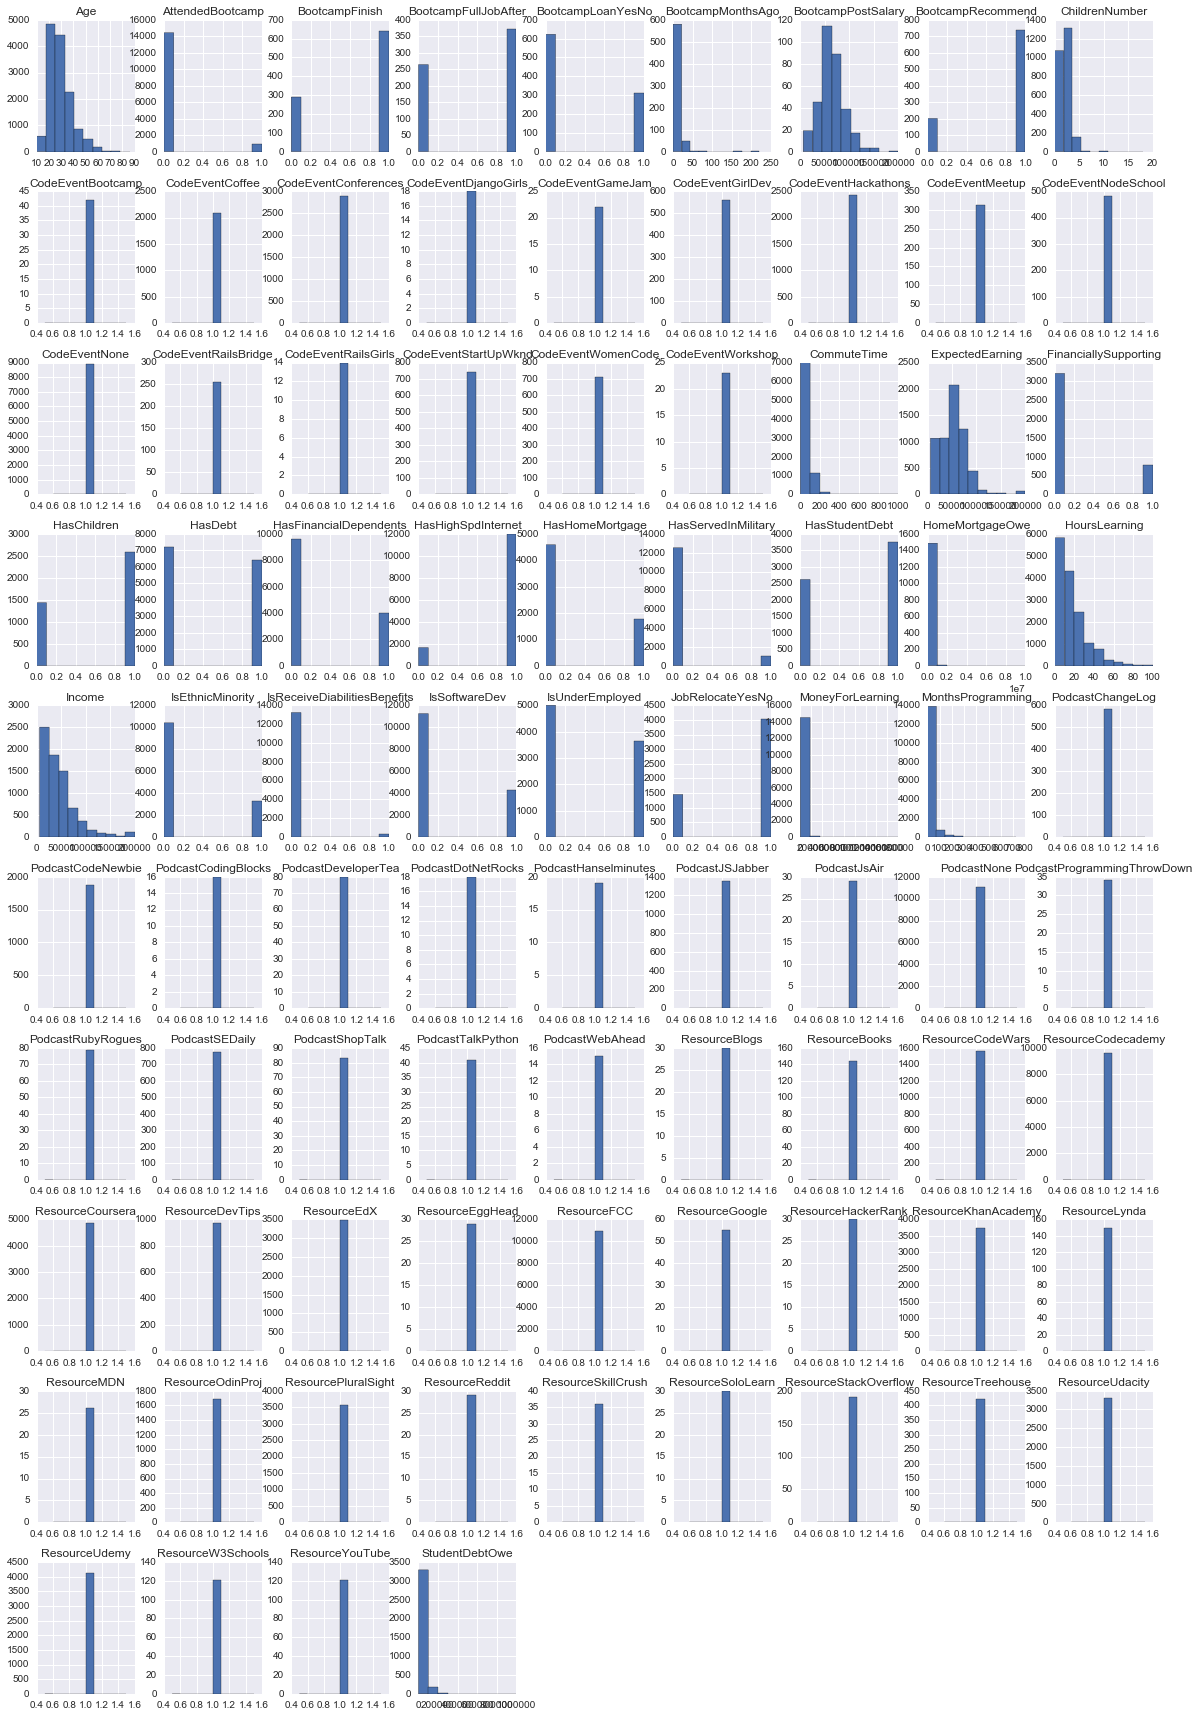

In [10]:
df.hist(figsize=(20,30));

## Exploring relationships


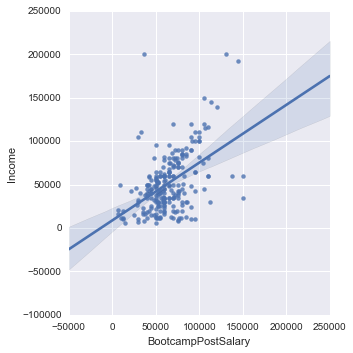

In [11]:
sns.lmplot("BootcampPostSalary", "Income", df);

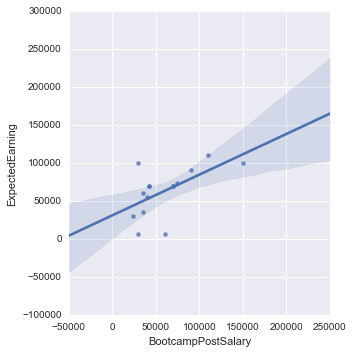

In [12]:
sns.lmplot("BootcampPostSalary", "ExpectedEarning", df);

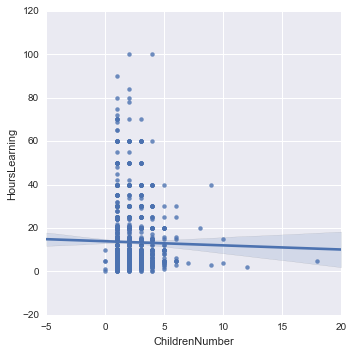

In [13]:
sns.lmplot("ChildrenNumber", "HoursLearning", df);

### test some polynomial variations

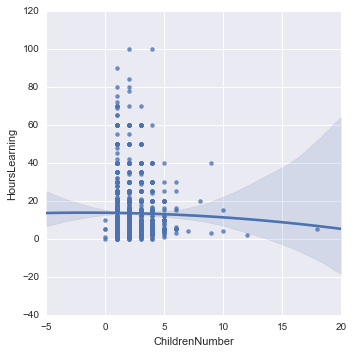

In [14]:
sns.lmplot("ChildrenNumber", "HoursLearning", df, order=2);

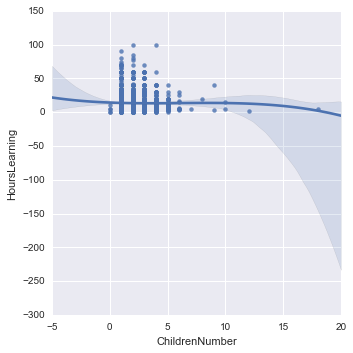

In [15]:
sns.lmplot("ChildrenNumber", "HoursLearning", df, order=3);

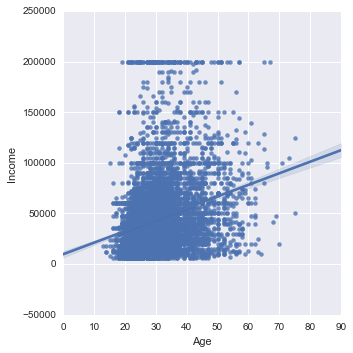

In [16]:
sns.lmplot("Age", "Income", df);

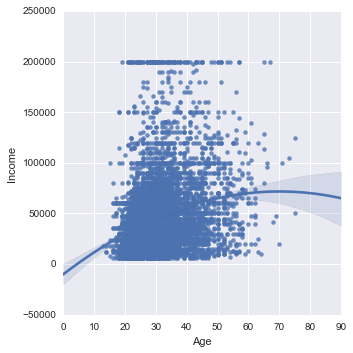

In [17]:
sns.lmplot("Age", "Income", df, order=2);

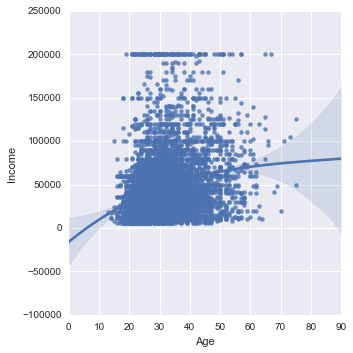

In [18]:
sns.lmplot("Age", "Income", df, order=3);

### Our Goal

To look at the relationship between age, income prior to attending the course, and salary after attending a bootcamp bootcamp

In [19]:
df = pd.read_csv(DATA_DIR + '2016-FCC-New-Coders-Survey-Data.csv', low_memory=False)

In [20]:
# need to drop rows that are missing key values, ie: age, income, bootcamppostsalary

#df = df[np.isfinite(df['Age'])]
#df.info()

Int64Index: 13613 entries, 0 to 15619

We have to clean up our data first by finding a minimum viable set that matches our needs.

In [21]:
df = df[np.isfinite(df['Income'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7329 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 6.4+ MB


Int64Index: 7305 entries, 0 to 15619

In [22]:
df = df[np.isfinite(df['BootcampPostSalary'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 97 to 15600
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 215.5+ KB


Int64Index: 241 entries, 97 to 15600

In [23]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,241.000000,242.0,242.0,242.0,242.000000,242.000000,242.000000,242.000000,45.000000,5.0,...,0.0,1.0,0.0,2.0,14.0,40.0,71.0,0.0,0.0,88.000000
mean,30.190871,1.0,1.0,1.0,0.330579,11.929752,63828.822314,0.863636,1.733333,1.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,27523.863636
std,6.299213,0.0,0.0,0.0,0.471396,12.837608,24520.325770,0.343886,0.863397,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,28299.945146
min,20.000000,1.0,1.0,1.0,0.000000,0.000000,6000.000000,0.000000,1.000000,1.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,500.000000
25%,NaN,1.0,1.0,1.0,0.000000,5.000000,50000.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.0,1.0,1.0,0.000000,9.000000,60000.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.0,1.0,1.0,1.000000,16.000000,75000.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,57.000000,1.0,1.0,1.0,1.000000,156.000000,150000.000000,1.000000,4.000000,1.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,180000.000000


### Lets plot again 

<img style="float: left;" src="before_filter.png">
<img style="float: ;" src="after_filter.png">

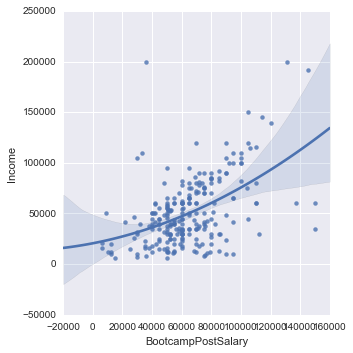

In [25]:
sns.lmplot("BootcampPostSalary", "Income", df, order=2)

## separate training and testing data

In [26]:
i = df.index.tolist()

train = df.ix[i[:180]]
test = df.ix[i[180:]]

### Orthogonal Polynomials

In [27]:
income = df.Income.values
bcps = df.BootcampPostSalary.values
y = income

bcps_poly = dmatrix('C(bcps, Poly)')

In [28]:
bcps_poly

DesignMatrix with shape (242, 67)
  Columns:
    ['Intercept',
     'C(bcps, Poly).Linear',
     'C(bcps, Poly).Quadratic',
     'C(bcps, Poly).Cubic',
     'C(bcps, Poly)^4',
     'C(bcps, Poly)^5',
     'C(bcps, Poly)^6',
     'C(bcps, Poly)^7',
     'C(bcps, Poly)^8',
     'C(bcps, Poly)^9',
     'C(bcps, Poly)^10',
     'C(bcps, Poly)^11',
     'C(bcps, Poly)^12',
     'C(bcps, Poly)^13',
     'C(bcps, Poly)^14',
     'C(bcps, Poly)^15',
     'C(bcps, Poly)^16',
     'C(bcps, Poly)^17',
     'C(bcps, Poly)^18',
     'C(bcps, Poly)^19',
     'C(bcps, Poly)^20',
     'C(bcps, Poly)^21',
     'C(bcps, Poly)^22',
     'C(bcps, Poly)^23',
     'C(bcps, Poly)^24',
     'C(bcps, Poly)^25',
     'C(bcps, Poly)^26',
     'C(bcps, Poly)^27',
     'C(bcps, Poly)^28',
     'C(bcps, Poly)^29',
     'C(bcps, Poly)^30',
     'C(bcps, Poly)^31',
     'C(bcps, Poly)^32',
     'C(bcps, Poly)^33',
     'C(bcps, Poly)^34',
     'C(bcps, Poly)^35',
     'C(bcps, Poly)^36',
     'C(bcps, Poly)^37',
    

In [29]:
bcps_poly1 = dmatrix('bcps', df)

bcps_sq = dmatrix('np.power(bcps,2)', df)

bcps_poly2 = dmatrix('bcps + np.power(bcps,2)')

# Orthoganal Polynnomials for ^3, ^5 and ^25
bcps_poly3  = bcps_poly[:, :4]
bcps_poly5  = bcps_poly[:, :6]
bcps_poly25 = bcps_poly[:, :26]

In [30]:
Xs = [bcps_poly1, bcps_sq, bcps_poly2, bcps_poly3, bcps_poly5, bcps_poly25]

In [31]:
bcps_poly1_pred = sm.OLS(y, bcps_poly1).fit().predict()
bcps_sq_pred = sm.OLS(y, bcps_sq).fit().predict()
bcps_poly2_pred = sm.OLS(y, bcps_poly2).fit().predict()
bcps_poly3_pred = sm.OLS(y, bcps_poly3).fit().predict()
bcps_poly5_pred = sm.OLS(y, bcps_poly5).fit().predict()
bcps_poly25_pred = sm.OLS(y, bcps_poly25).fit().predict()

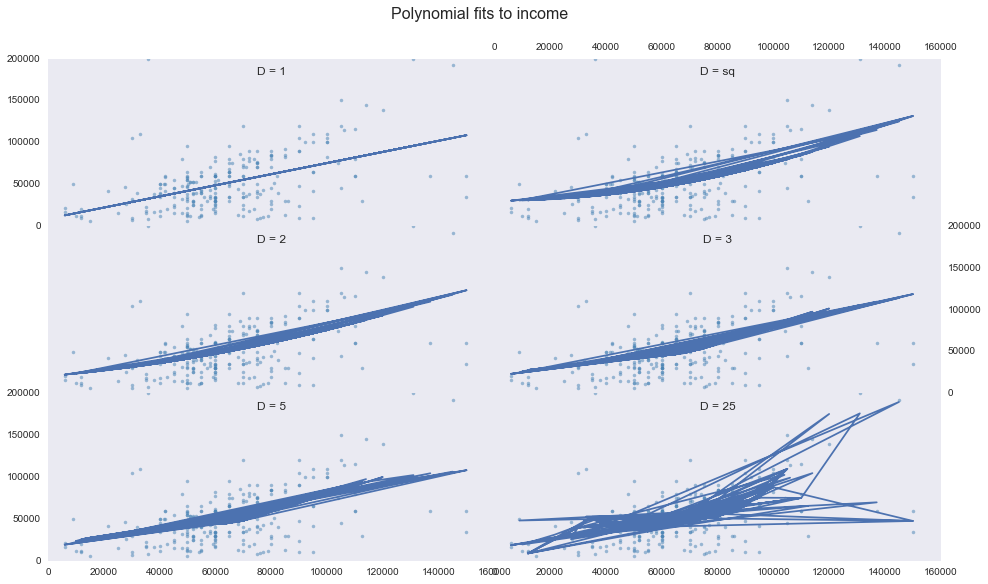

In [32]:
import matplotlib.pyplot as plt

plt.figure()

fig, ax = plt.subplots(3, 2, sharex = True, sharey = True, figsize=(16,9))
fig.subplots_adjust(hspace = 0.0, wspace = 0.0)
fig.suptitle('Polynomial fits to income', fontsize = 16.0)

# Iterate through panels (a), model predictions (p), and the polynomial 
# degree of the model (d). Plot the data, the predictions, and label
# the graph to indicate the degree used.
preds = [bcps_poly1_pred, bcps_sq_pred, bcps_poly2_pred,
         bcps_poly3_pred, bcps_poly5_pred, bcps_poly25_pred]
orders = ['1', 'sq', '2', '3', '5', '25']

for a, p, d in zip(ax.ravel(), preds, orders):
    a.plot(df.BootcampPostSalary.values, df.Income.values, '.', color = 'steelblue', alpha = 0.5)
    a.plot(df.BootcampPostSalary.values, p)
    a.text(.5, .95, 'D = ' + d, fontsize = 12,
           verticalalignment = 'top',
           horizontalalignment = 'center',
           transform = a.transAxes)
    a.grid()
    
# Alternate axes that have tick labels to avoid overlap.
plt.setp(fig.axes[2].get_yaxis().get_ticklabels(), visible = False)
plt.setp(fig.axes[3].get_yaxis(), ticks_position = 'right')   
plt.setp(fig.axes[1].get_xaxis(), ticks_position = 'top')
plt.setp(fig.axes[3].get_xaxis().get_ticklabels(), visible = False);

![title](poly_fit.png)



In [33]:
for order, X in zip(orders, Xs):
    print "%s : %.03f" % (order, sm.OLS(y, X).fit().rsquared)

1 : 0.239
sq : 0.243
2 : 0.246
3 : 0.257
5 : 0.261
25 : 0.409


In [35]:
# missing_values = [(col,is_null(col)) for col in df if is_null(col)]
# missing_values

ERROR! Session/line number was not unique in database. History logging moved to new session 12


KeyboardInterrupt: 

In [36]:
from sklearn import feature_selection as fs

def f_regression_feature_selection(input, response):    
# use this against your feature matrix to determine p-values for
# each feature (we care about the second array it returns).
    return fs.univariate_selection.f_regression(input, response)    

ERROR! Session/line number was not unique in database. History logging moved to new session 13


In [37]:
data = pd.DataFrame(X,y).reset_index()

In [35]:
#g = sns.PairGrid(data, diag_sharey=False)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.map_upper(plt.scatter)
#g.map_diag(sns.kdeplot, lw=3)

KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
# How many features don't meet the F test threshold?
sum(f_regression_feature_selection(X,y)[0] < 10)

In [ ]:
# Which column are we talking about?
select = f_regression_feature_selection(X,y)[0] < 10
X.columns[select]

In [ ]:
# difference between the ones available and the ones we wish to drop
select = pd.Index(X.columns).difference(pd.Index(X.columns[select]))

Xs = X[select]

In [ ]:
Xs.head()

In [ ]:
# How many features don't meet the F test threshold?
sum(f_regression_feature_selection(Xs,y)[1] > 0.05)

In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
log_lm = linear_model.LinearRegression()

In [ ]:
income = [ [x] for x in df['Income'].values ]
age = df['Age'].values

In [ ]:
lm.fit(income, age)

## lets generate some r values!

![title](sunday.jpg)

![title](the-end.png)